In [1]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from matplotlib import pyplot as plt


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

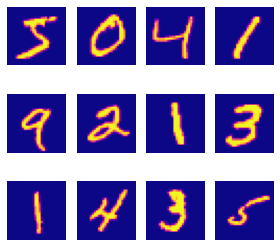

In [27]:
plt.figure( figsize= (4,4) )

for sch in range(12):
    plt.subplot( 3,4, sch+1)
    plt.imshow(X_train[ sch], cmap='plasma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
y_train.shape

(60000,)

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
28*28

784

In [3]:
X_train_L = X_train.reshape(60000, 784).astype('float32')
X_valid_L = X_valid.reshape(10000, 784).astype('float32')

In [35]:
X_train_L[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [4]:
X_train_L /=255
X_valid_L /= 255 


In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)


In [6]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,) ) )
model.add(Dense(10, activation='softmax' ) )



In [7]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'] )

In [8]:
model.fit(X_train_L, y_train, 
          batch_size=128, epochs=200, 
          verbose=1, validation_data=(X_valid_L, y_valid) )


Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 2.0972 - accuracy: 0.4371 - val_loss: 1.8405 - val_accuracy: 0.6782
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 1.6517 - accuracy: 0.7132 - val_loss: 1.4489 - val_accuracy: 0.7576
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 1.3170 - accuracy: 0.7730 - val_loss: 1.1659 - val_accuracy: 0.7989
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 1.0824 - accuracy: 0.8032 - val_loss: 0.9731 - val_accuracy: 0.8236
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.9220 - accuracy: 0.8215 - val_loss: 0.8407 - val_accuracy: 0.8389
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.8097 - accuracy: 0.8350 - val_loss: 0.7465 - val_accuracy: 0.8498
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.7282 - accuracy: 0.8453 - val_loss: 0.6758 - val_accuracy: 0.8583

Epoch 58/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.9185 - val_loss: 0.2795 - val_accuracy: 0.9219
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.9190 - val_loss: 0.2782 - val_accuracy: 0.9225
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.9196 - val_loss: 0.2769 - val_accuracy: 0.9225
Epoch 61/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.9199 - val_loss: 0.2756 - val_accuracy: 0.9228
Epoch 62/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.9204 - val_loss: 0.2742 - val_accuracy: 0.9223
Epoch 63/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2808 - accuracy: 0.9206 - val_loss: 0.2732 - val_accuracy: 0.9235
Epoch 64/200
469/469 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.9212 - val_loss: 0.2720 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9343 - val_loss: 0.2283 - val_accuracy: 0.9344
Epoch 116/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.9343 - val_loss: 0.2277 - val_accuracy: 0.9341
Epoch 117/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9346 - val_loss: 0.2269 - val_accuracy: 0.9345
Epoch 118/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2276 - accuracy: 0.9348 - val_loss: 0.2263 - val_accuracy: 0.9350
Epoch 119/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9349 - val_loss: 0.2256 - val_accuracy: 0.9352
Epoch 120/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9354 - val_loss: 0.2252 - val_accuracy: 0.9352
Epoch 121/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.9353 - val_loss: 0.2245 - val_ac

469/469 [==============================] - 1s 2ms/step - loss: 0.1954 - accuracy: 0.9445 - val_loss: 0.1974 - val_accuracy: 0.9425
Epoch 172/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.9446 - val_loss: 0.1969 - val_accuracy: 0.9426
Epoch 173/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1945 - accuracy: 0.9446 - val_loss: 0.1965 - val_accuracy: 0.9425
Epoch 174/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1939 - accuracy: 0.9448 - val_loss: 0.1961 - val_accuracy: 0.9425
Epoch 175/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1934 - accuracy: 0.9449 - val_loss: 0.1956 - val_accuracy: 0.9431
Epoch 176/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1929 - accuracy: 0.9451 - val_loss: 0.1952 - val_accuracy: 0.9425
Epoch 177/200
469/469 [==============================] - 1s 2ms/step - loss: 0.1924 - accuracy: 0.9452 - val_loss: 0.1947 - val_accuracy: 0.9434